### Import Dependencies

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Creating Pseudo Data

In [15]:
beta_0 = 3.0
beta_1 = 6.0
beta_2 = 0.5
beta_3 = 0.75

def cubic_augment(x):
    return (beta_0 + beta_1*x + beta_2 * (x ** 2) + beta_3 * (x ** 3)) + np.random.uniform(-5, 5, size=1)
cubic_np = np.vectorize(cubic_augment)

In [19]:
X_train = np.random.uniform(-5, 5, size=30)

In [20]:
y_train = cubic_np(X_train)

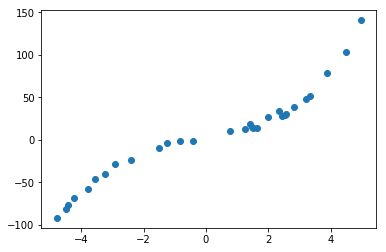

In [21]:
plt.scatter(X_train, y_train)

In [104]:
def train(X_data, y_data, degree=3, batch_size=5, learning_rate=0.0001):
    # Initialize the parameter list
    beta_list = [np.random.uniform(0, 3) for _ in range(degree + 1)]
    convergence = 0.9
    loss = 500000
    previous_losses = []
    previous = False
    while loss > convergence and previous == False:
        loss_list = []
        # We are going to be training by vectorization, instead of individually computing the gradients
        for i in range(len(X_data) // batch_size):
            x_batch = X_data[i * batch_size: (i + 1) * batch_size]
            y_batch = y_data[i * batch_size: (i + 1) * batch_size]
            
            y_hat = np.sum([beta_list[i] * (x_batch ** i) for i in range(degree + 1) ],axis=0)
            batch_loss = ((y_hat - y_batch) ** 2) * (1/float(batch_size))
            loss_list.append(batch_loss)
            gradient_list = [np.sum(2 * (y_hat - y_batch) * (x_batch ** i)) for i in range(degree +1)]
            
            beta_list = beta_list - np.multiply(((1.0/float(batch_size)) * learning_rate) , gradient_list)
        
        loss = np.sum(loss_list)
        previous_losses.append(loss)
        if len(previous_losses) > 50 and list(map(int, previous_losses[-30:-1:])) == list(map(int, previous_losses[-29::])):
            previous = True
    return beta_list

In [105]:
beta_list = [np.random.uniform(0, 3) for _ in range(3 + 1)]
y_hat = np.sum([beta_list[i] * (X_train ** i) for i in range(3 + 1) ],axis=0)

In [106]:
y_hat.shape

(30,)

In [107]:
train(X_train, y_train)

array([2.22099936, 5.1244553 , 0.54596651, 0.79284898])

In [80]:
beta_list

[0.9617990440051114,
 0.9339799154516276,
 0.9558944136703837,
 0.4406147764456708]

In [91]:
beta_list[-3::]

[0.9339799154516276, 0.9558944136703837, 0.4406147764456708]